In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("fetal_health.csv")
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

Classes to work with :
- *Normal* : 1
- *Suspect* : 2 
- *Pathological* : 3

In [4]:
df.rename(columns={"percentage_of_time_with_abnormal_long_term_variability":"%_time_with_abnormal_long_term_variability"}, inplace=True)

<Axes: >

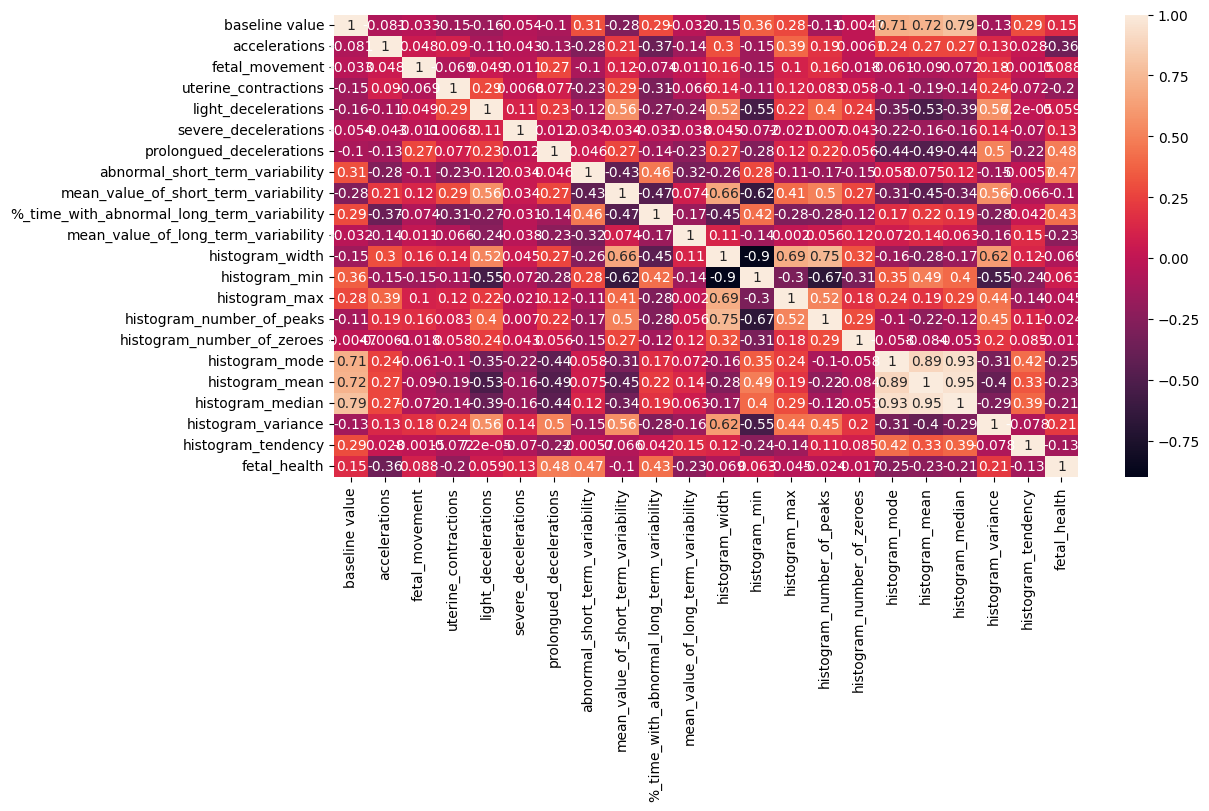

In [5]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)

In [6]:
fetal_health_corr = df.corr()['fetal_health']

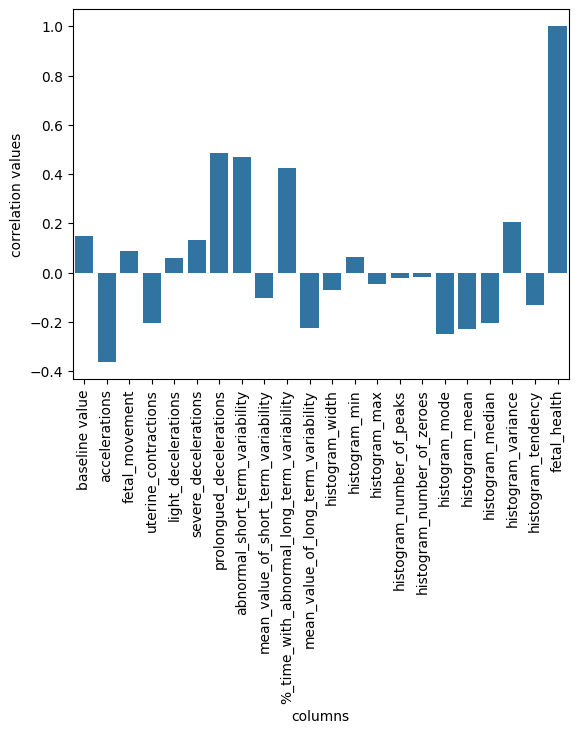

In [7]:
sns.barplot(x = fetal_health_corr.index, y=fetal_health_corr.values)
plt.xticks(rotation=90);
plt.xlabel('columns');
plt.ylabel('correlation values');

<Axes: xlabel='histogram_median', ylabel='histogram_variance'>

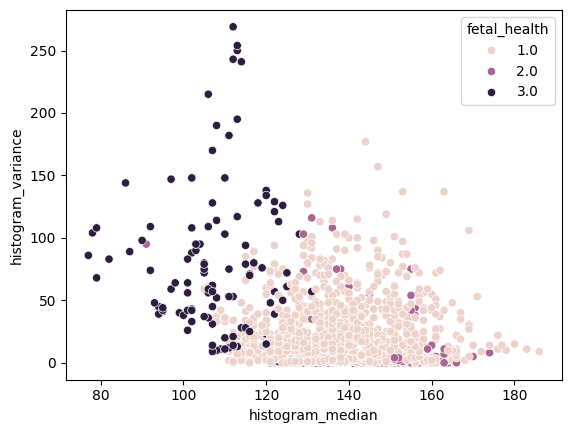

In [8]:
sns.scatterplot(data=df, x='histogram_median',y='histogram_variance',hue='fetal_health')

<Axes: xlabel='histogram_median', ylabel='histogram_mode'>

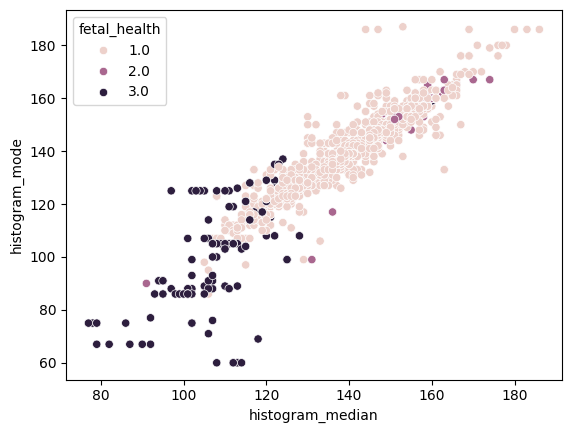

In [9]:
sns.scatterplot(data=df, x='histogram_median',y='histogram_mode',hue='fetal_health')

<Axes: xlabel='accelerations', ylabel='prolongued_decelerations'>

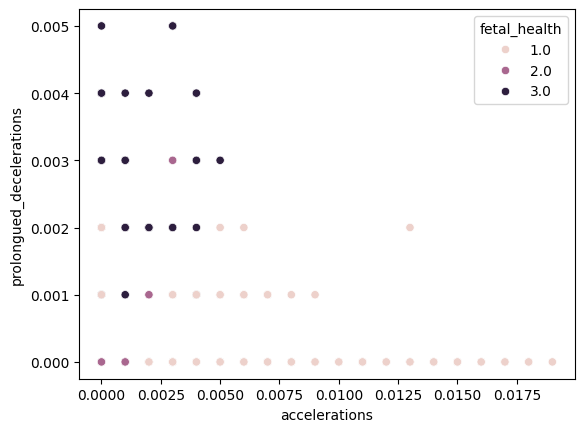

In [10]:
sns.scatterplot(data=df, x='accelerations',y='prolongued_decelerations',hue='fetal_health')

<Axes: xlabel='histogram_number_of_peaks', ylabel='histogram_number_of_zeroes'>

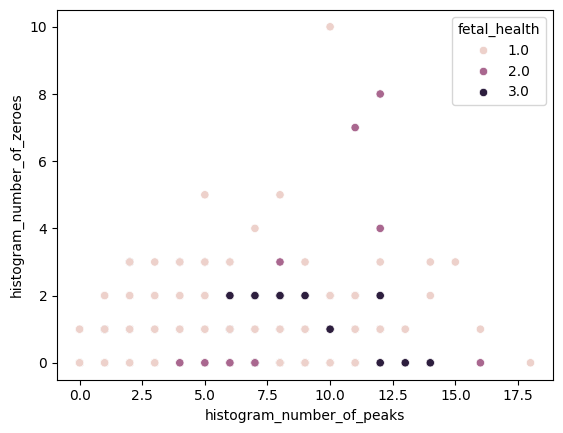

In [11]:
sns.scatterplot(data=df, hue='fetal_health', x='histogram_number_of_peaks', y='histogram_number_of_zeroes')

### Logistic Regression Model

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [13]:
X = df.drop(columns=['fetal_health'])
y = df['fetal_health']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

**Scaling**

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
test_log_model = LogisticRegression()

In [16]:
test_log_model.fit(X_train, y_train)

LogisticRegression()

In [17]:
y_pred = test_log_model.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay, classification_report

In [19]:
accuracy_score(y_test, y_pred)

0.8746081504702194

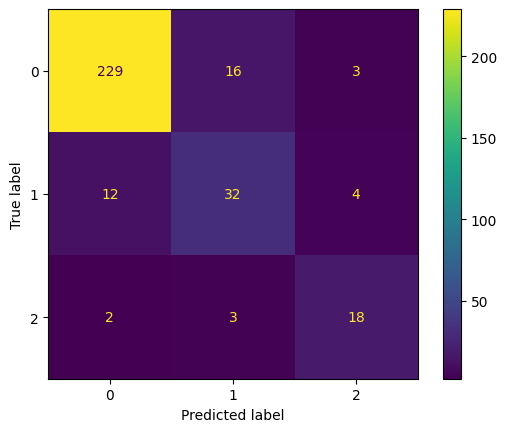

In [20]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()

In [21]:
from sklearn.metrics import roc_curve, auc
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

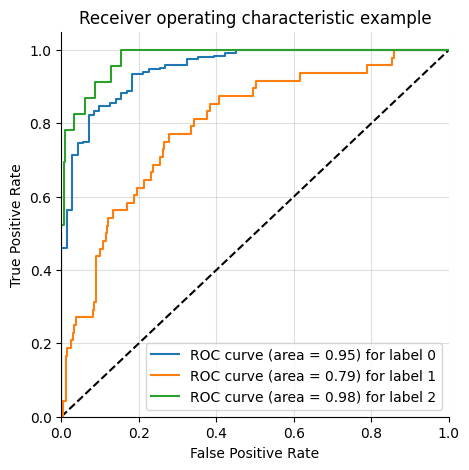

In [22]:
plot_multiclass_roc(test_log_model, X_test, y_test, 3)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.94      0.92      0.93       248
         2.0       0.63      0.67      0.65        48
         3.0       0.72      0.78      0.75        23

    accuracy                           0.87       319
   macro avg       0.76      0.79      0.78       319
weighted avg       0.88      0.87      0.88       319



In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
kn_model = KNeighborsClassifier(5)

In [27]:
kn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
kn_y_predict = kn_model.predict(X_test)

In [40]:
print(classification_report(y_test, kn_y_predict))

              precision    recall  f1-score   support

         1.0       0.94      0.97      0.96       248
         2.0       0.85      0.71      0.77        48
         3.0       0.83      0.83      0.83        23

    accuracy                           0.92       319
   macro avg       0.87      0.84      0.85       319
weighted avg       0.92      0.92      0.92       319



In [41]:
k_values = np.arange(1,15)
confusion_matrices = []
for k in k_values:
    ki_model = KNeighborsClassifier(k)
    ki_model.fit(X_train, y_train)

    yi_predict = ki_model.predict(X_test)
    cm = confusion_matrix(y_test, yi_predict)

    confusion_matrices.append(cm)
    

In [43]:
k7_model = KNeighborsClassifier(7)
k7_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [45]:
y7_predict = k7_model.predict(X_test)

In [46]:
print(classification_report(y_test, y7_predict))

              precision    recall  f1-score   support

         1.0       0.94      0.98      0.96       248
         2.0       0.85      0.69      0.76        48
         3.0       0.90      0.78      0.84        23

    accuracy                           0.92       319
   macro avg       0.89      0.82      0.85       319
weighted avg       0.92      0.92      0.92       319



In [48]:
plot_multiclass_roc(k7_model, X_test, y_test, 3)

AttributeError: 'KNeighborsClassifier' object has no attribute 'decision_function'